### Zadania

Lista składa się z dwóch sekcji: pierwsza (zadania 1 i 2) dotyczy metod detekcji krawędzi, druga (zadania 3 i 4) operacji na histogramach.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

##### Zad. 1: Wyznaczenie gradientów

Wykonaj dla obrazu `coins` sztuczny obraz ilustrujący wielkość (moduł) wektora gradientu w danym punkcie. Do wyświetlenia użyj [mapy kolorów](https://matplotlib.org/stable/tutorials/colors/colormaps.html) `hot` do oznaczenia wielkości gradientu odpowiednim kolorem – im większa wartość, tym bardziej czerwony (_mapa ciepła_).  
Gdzie gradienty są bliskie zera?  
Czy uzyskany wynik pozwoliłby np. na detekcję obiektów?

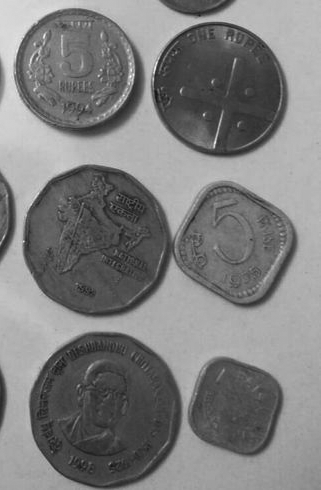

In [2]:
coins = cv2.imread('../dane1-4/Monety_szare.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins)

Rozwiązanie:

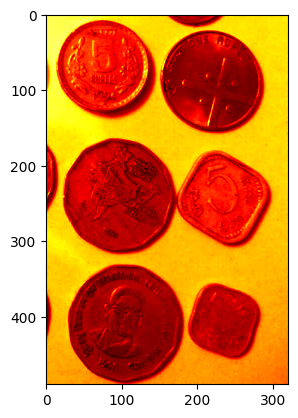

In [3]:
plt.imshow(coins, cmap='hot') # przykład wyświetlania z mapą kolorów

In [37]:
from typing import Literal

def gradient_plot(img, operator: Literal['sobel', 'scharr'] = 'sobel') -> None:
    if operator == 'sobel':
        sobelx = cv2.Sobel(src = img, ddepth = cv2.CV_64F, dx = 1, dy = 0, ksize = 3)
        sobely = cv2.Sobel(src = img, ddepth = cv2.CV_64F, dx = 0, dy = 1, ksize = 3)
    else:
        sobelx = cv2.Scharr(src = img, ddepth = cv2.CV_64F, dx = 1, dy = 0)
        sobely = cv2.Scharr(src = img, ddepth = cv2.CV_64F, dx = 0, dy = 1)
    modul = np.sqrt(sobelx**2 + sobely**2)
    modul = cv2.normalize(modul, None, 0, 255, cv2.NORM_MINMAX)
    modul = modul.astype(np.uint8)

    _, axs = plt.subplots(1, 2, figsize = (10, 7))
    axs[0].imshow(img, cmap = 'gray')
    axs[0].axis('off')
    axs[0].set_title('Original image')
    axs[1].imshow(modul, cmap = 'hot')
    axs[1].axis('off')
    axs[1].set_title('Gradient module')
    plt.show()  

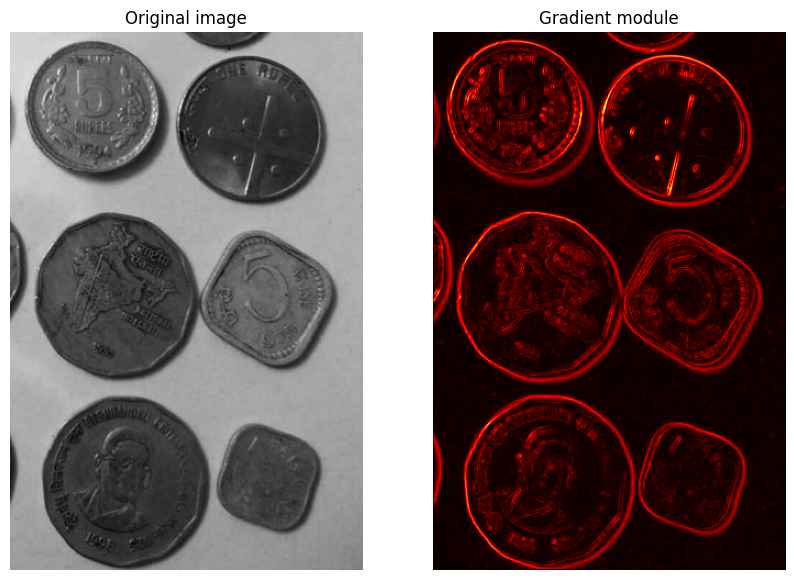

In [38]:
gradient_plot(coins)

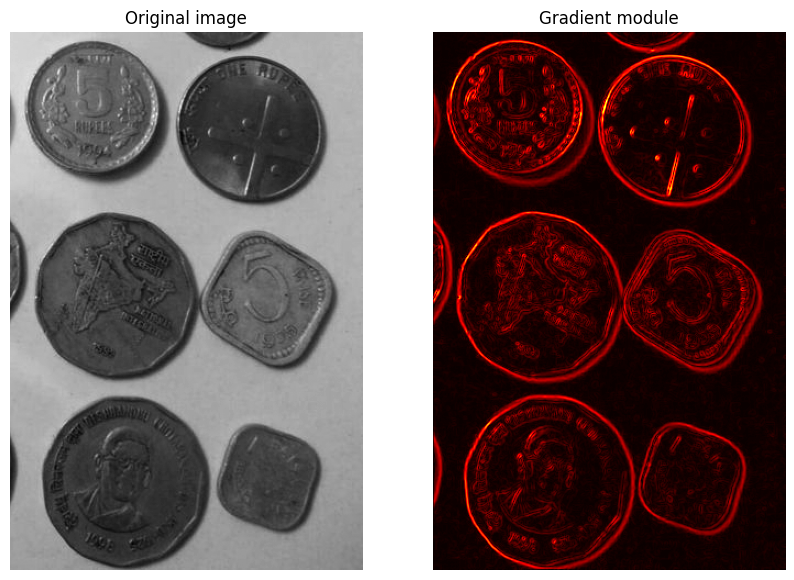

In [39]:
gradient_plot(coins, operator = 'scharr')

---

##### Zad. 2: Detekcja krawędzi

Przeprowadź z obrazem `coins_noise` takie przekształcenia, aby zmaksymalizować możliwość rozpoznania obiektów. Wykorzystaj [filtr Canny'ego](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga04723e007ed888ddf11d9ba04e2232de) do detekcji krawędzi; zbadaj jego zachowanie w zależności od wartości progów oraz sposobu redukcji szumu.

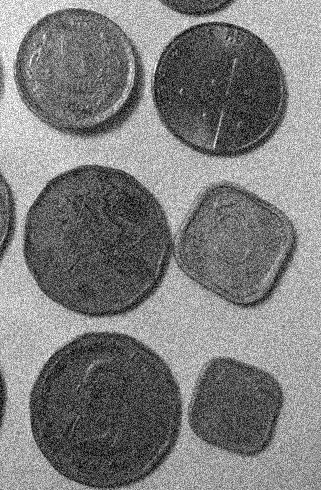

In [7]:
coins_noise = cv2.imread('../dane1-4/Monety_szare_szum.bmp', cv2.IMREAD_GRAYSCALE)
Image.fromarray(coins_noise)

Rozwiązanie:

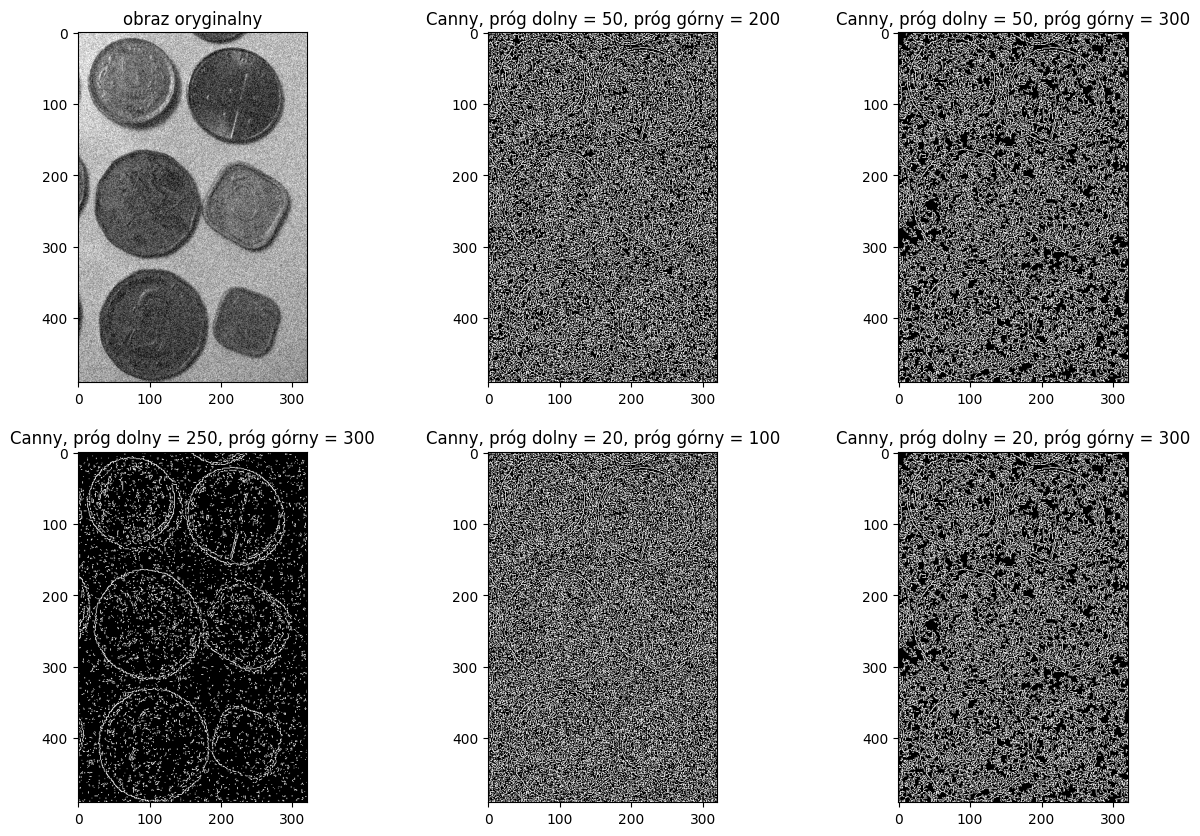

In [8]:
f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_noise, cmap = 'gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 50, 250, 20, 20], [200, 300, 300, 100, 300]):
    ax.imshow(cv2.Canny(image = coins_noise, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

#### Filtr uśredniający 3x3

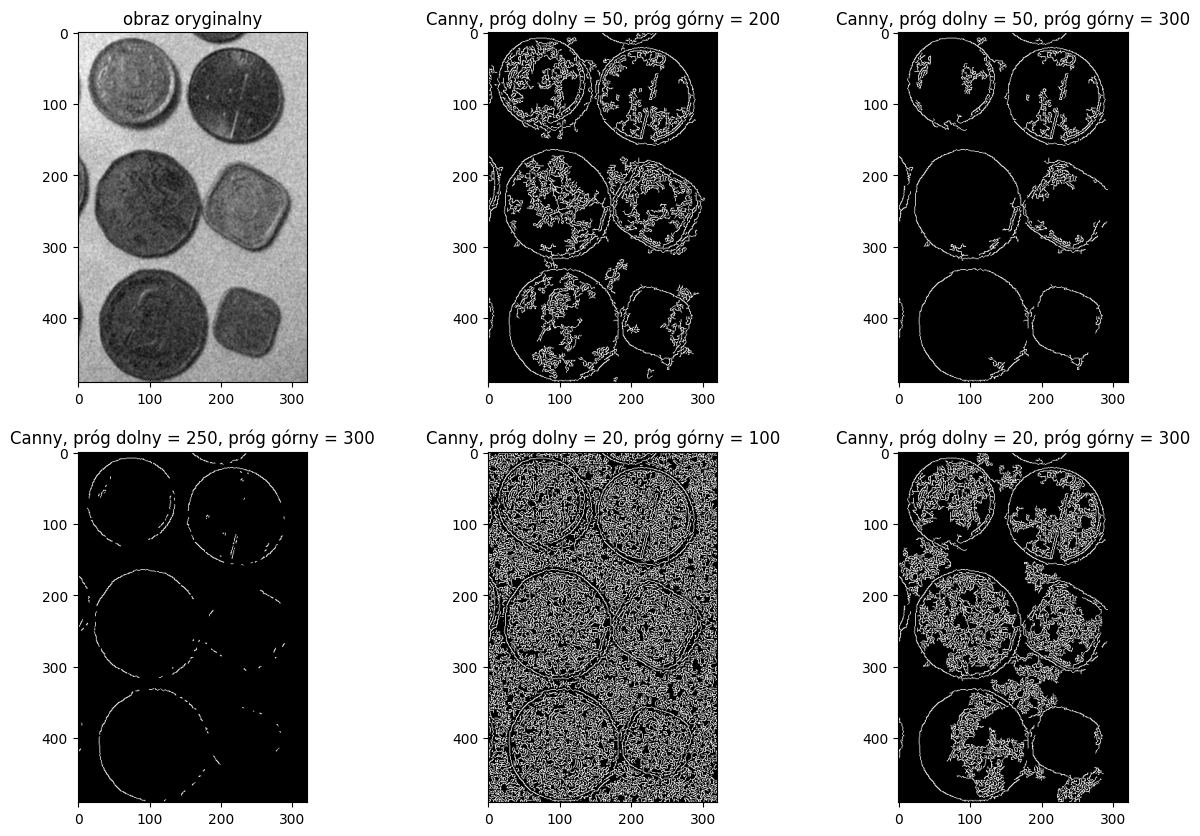

In [9]:
kernel_blur = np.ones((3, 3), np.float32) / 9
coins_filter1 = cv2.filter2D(src = coins_noise, ddepth = -1, kernel = kernel_blur)

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_filter1, cmap = 'gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 50, 250, 20, 20], [200, 300, 300, 100, 300]):
    ax.imshow(cv2.Canny(image = coins_filter1, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

#### Filtr uśredniający 5x5

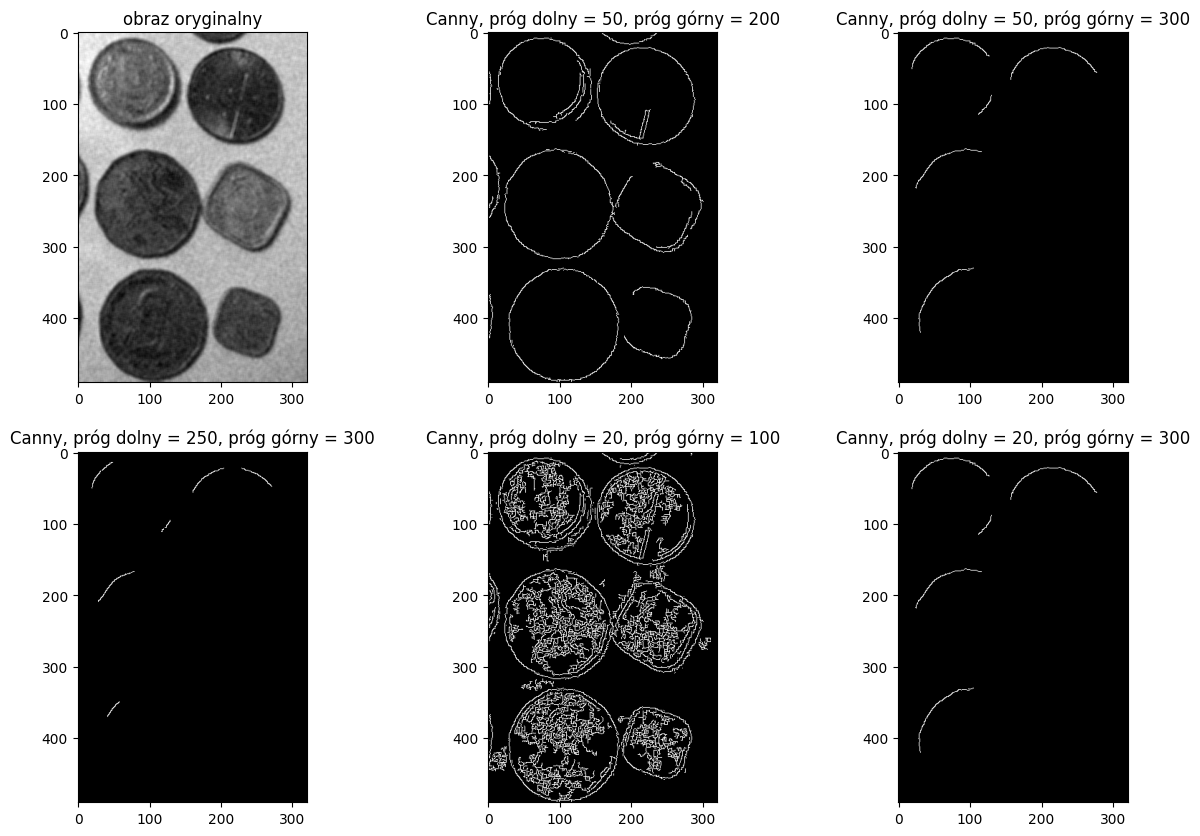

In [10]:
kernel_blur = np.ones((5, 5), np.float32) / 25
coins_filter1 = cv2.filter2D(src = coins_noise, ddepth = -1, kernel = kernel_blur)

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_filter1, cmap = 'gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 50, 250, 20, 20], [200, 300, 300, 100, 300]):
    ax.imshow(cv2.Canny(image = coins_filter1, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

#### Filtr uśredniający 7x7

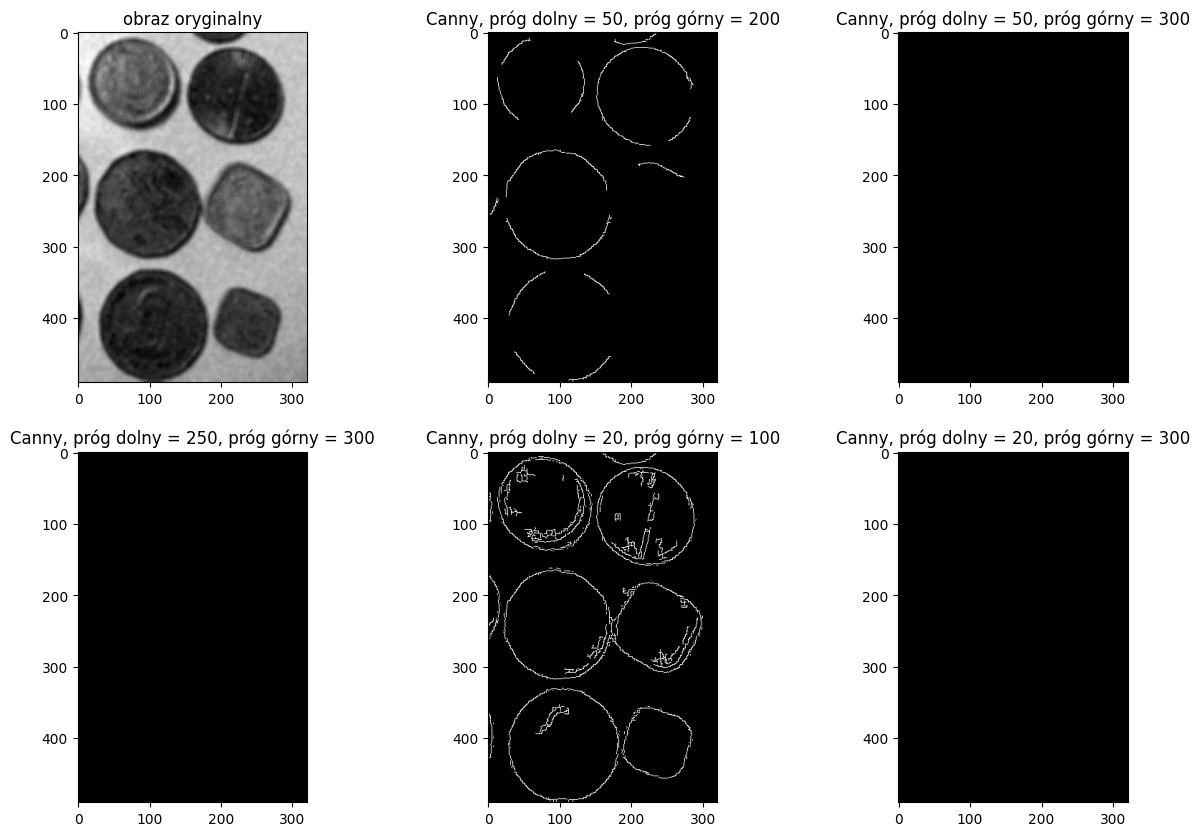

In [11]:
kernel_blur = np.ones((7, 7), np.float32) / 49
coins_filter1 = cv2.filter2D(src = coins_noise, ddepth = -1, kernel = kernel_blur)

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_filter1, cmap = 'gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 50, 250, 20, 20], [200, 300, 300, 100, 300]):
    ax.imshow(cv2.Canny(image = coins_filter1, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

#### Filtr Gaussa 7x7

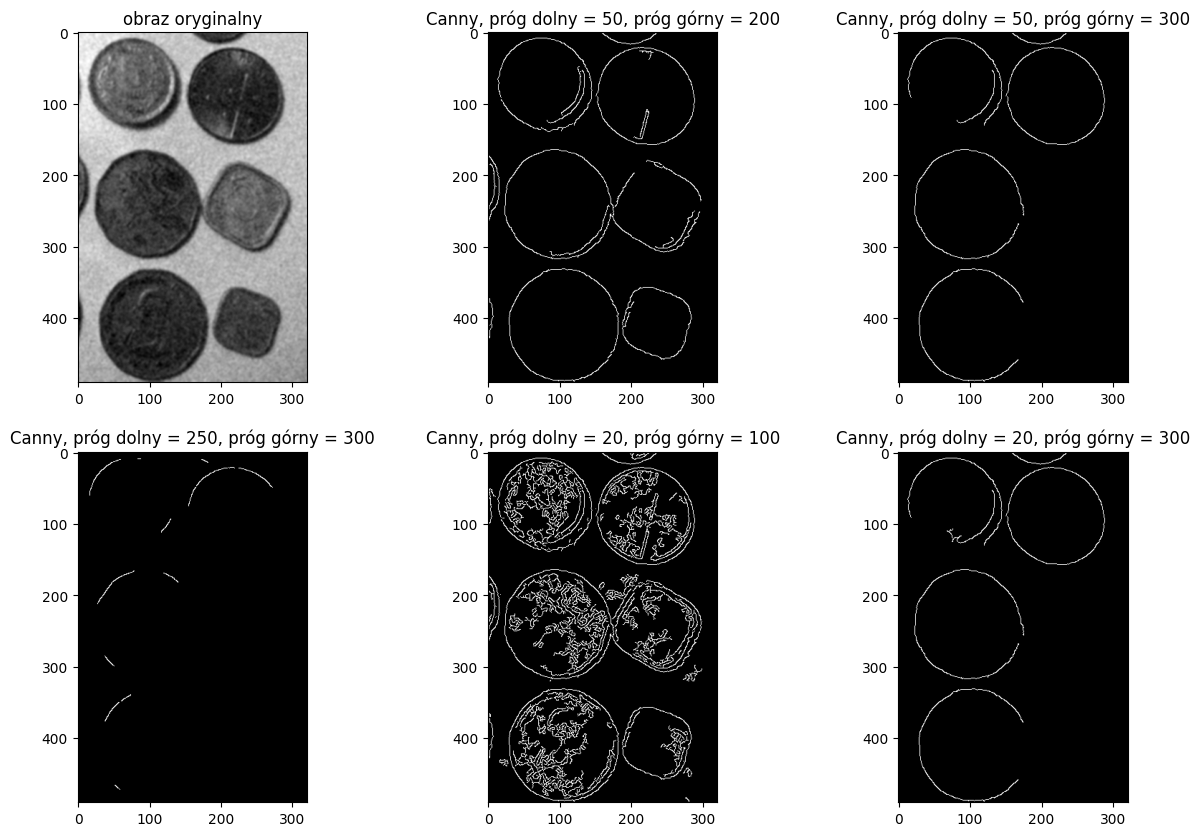

In [12]:
coins_filter2 = cv2.GaussianBlur(coins_noise, (7, 7), sigmaX = 0)

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_filter2, cmap = 'gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 50, 250, 20, 20], [200, 300, 300, 100, 300]):
    ax.imshow(cv2.Canny(image = coins_filter2, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

#### Filtr medianowy 7x7

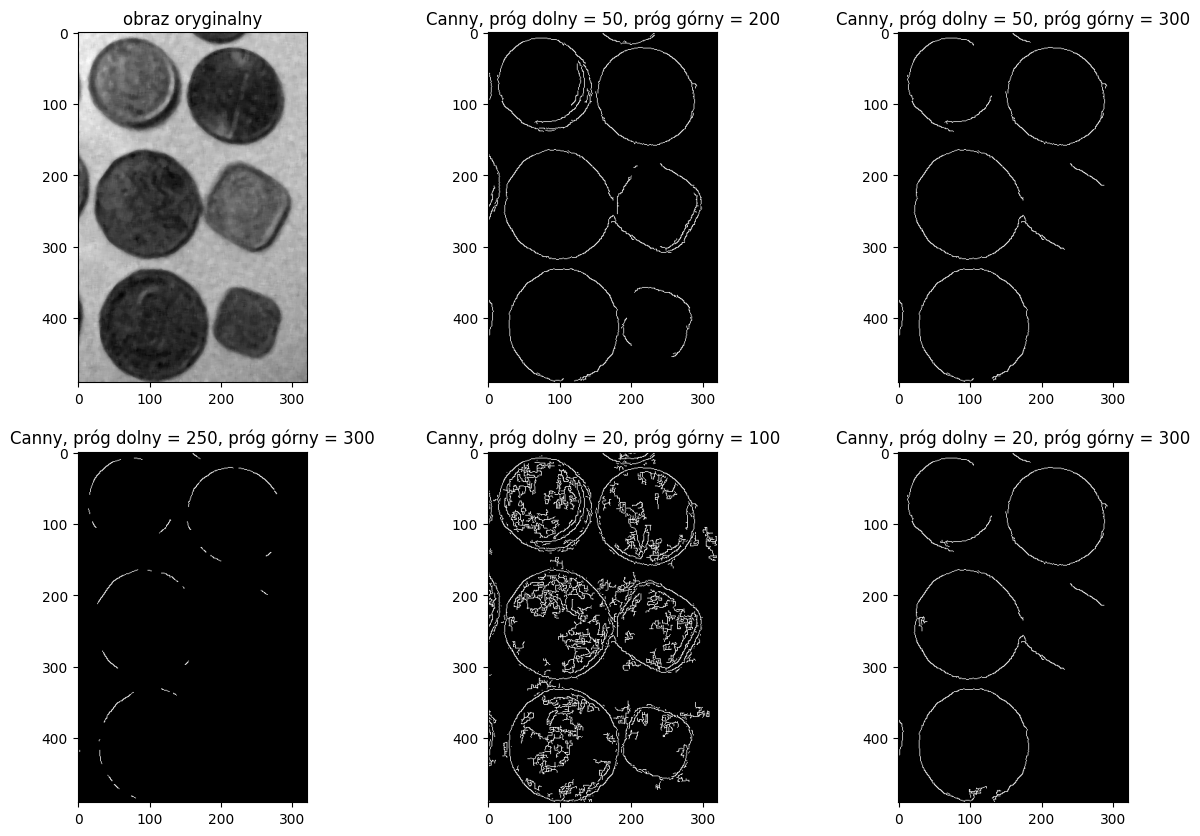

In [13]:
coins_filter2 = cv2.medianBlur(coins_noise, 7)

f, ((a1, a2, a3), (a4, a5, a6)) = plt.subplots(2, 3)
f.set_figwidth(15)
f.set_figheight(10)

a1.imshow(coins_filter2, cmap = 'gray');
a1.set_title('obraz oryginalny')

for ax, t1, t2 in zip([a2, a3, a4, a5, a6], [50, 50, 250, 20, 20], [200, 300, 300, 100, 300]):
    ax.imshow(cv2.Canny(image = coins_filter2, threshold1=t1, threshold2 = t2), cmap='gray');
    ax.set_title('Canny, próg dolny = {}, próg górny = {}'.format(t1, t2))

In [14]:
# import dash
# from dash import dcc, html
# import plotly.express as px
# import numpy as np

# # Tworzymy aplikację Dash
# app = dash.Dash(__name__)

# # Generujemy obraz za pomocą imshow
# fig = px.imshow(coins, color_continuous_scale = 'hot')

# # Layout aplikacji
# app.layout = html.Div([
#     dcc.Graph(figure=fig)  # Dodajemy wykres do interfejsu
# ])

# # Uruchamiamy aplikację
# if __name__ == '__main__':
#     app.run_server(debug=True)


---

##### Zad. 3: Wyrównanie histogramu

Wyrównaj histogram obrazu `coins_noise`. Wyniki zaprezentuj za pomocą obrazów i towarzyszących im histogramów. Oceń uzyskaną zmianę w obrazie.

In [44]:
def equalize_histogram(img: np.ndarray = coins_noise) -> None:
    
    eq_img = cv2.equalizeHist(img)
    
    _, axs = plt.subplots(2, 2, figsize = (17, 17))
    axs[0, 0].imshow(img, cmap = 'gray')
    axs[0, 0].axis('off')
    axs[0, 1].hist(img.flatten(), bins = 255, color = 'gray')
    axs[1, 0].imshow(eq_img, cmap = 'gray')
    axs[1, 0].axis('off')
    axs[1, 1].hist(eq_img.flatten(), bins = 255, color = 'gray')
    plt.show()

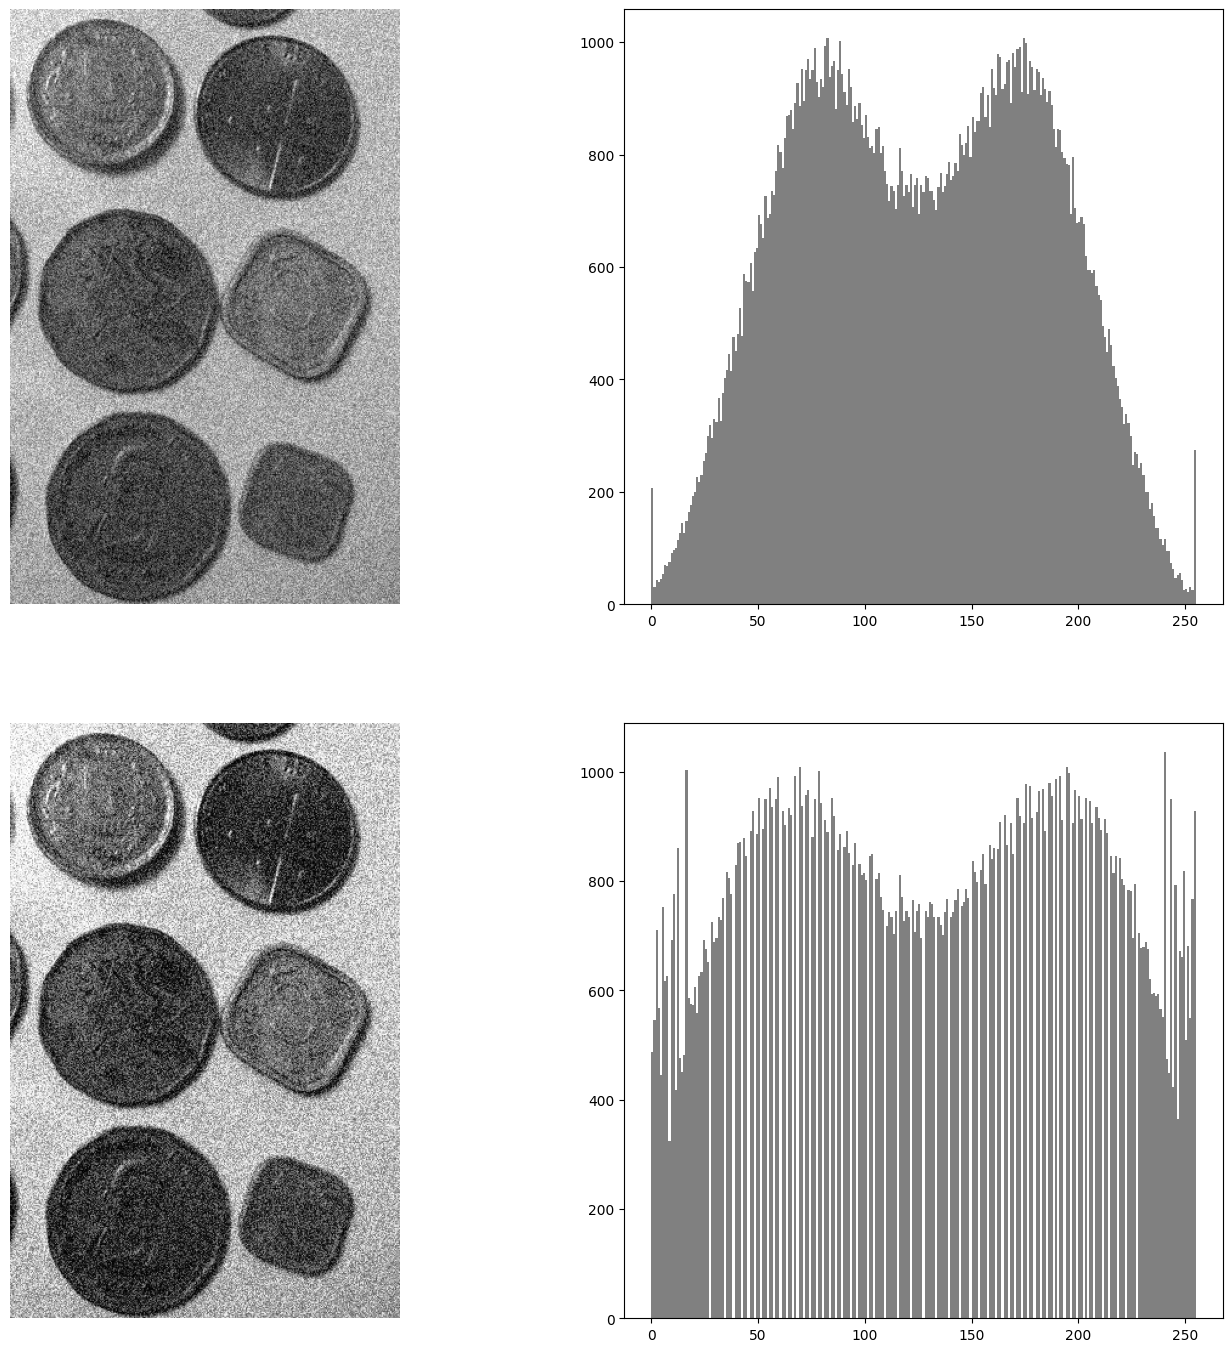

In [45]:
equalize_histogram()

---

##### Zad. 4: Transformacja do rozkładu docelowego

Dla obrazu `hare_gray` wykonaj transformację do wybranego (założonego przez siebie) rozkładu docelowego, tak aby zmaksymalizować możliwość wyodrębnienia obiektu z otoczenia (zająca) przy użyciu algorytmu binaryzacji Otsu. Zacznij od zastanowienia się nad doborem rozkładu docelowego (możesz zbadać zachowanie transformacji w zależności od wybranego rozkładu).

Podpowiedź: przedstawiona we wstępie teoretycznym transformacja obu rozkładów (źródłowego i docelowego) do rozkładu jednostajnego _nie musi_ zostać faktycznie wykonana (dlatego nie używaj w zadaniu funkcji `cv2.equalizeHist`)! Wystarczy porównywanie ze sobą wartości ze skumulowanych rozkładów (rysunek 3).

Podpowiedź 2: [cv2.LUT](https://docs.opencv.org/4.5.3/d2/de8/group__core__array.html#gab55b8d062b7f5587720ede032d34156f)

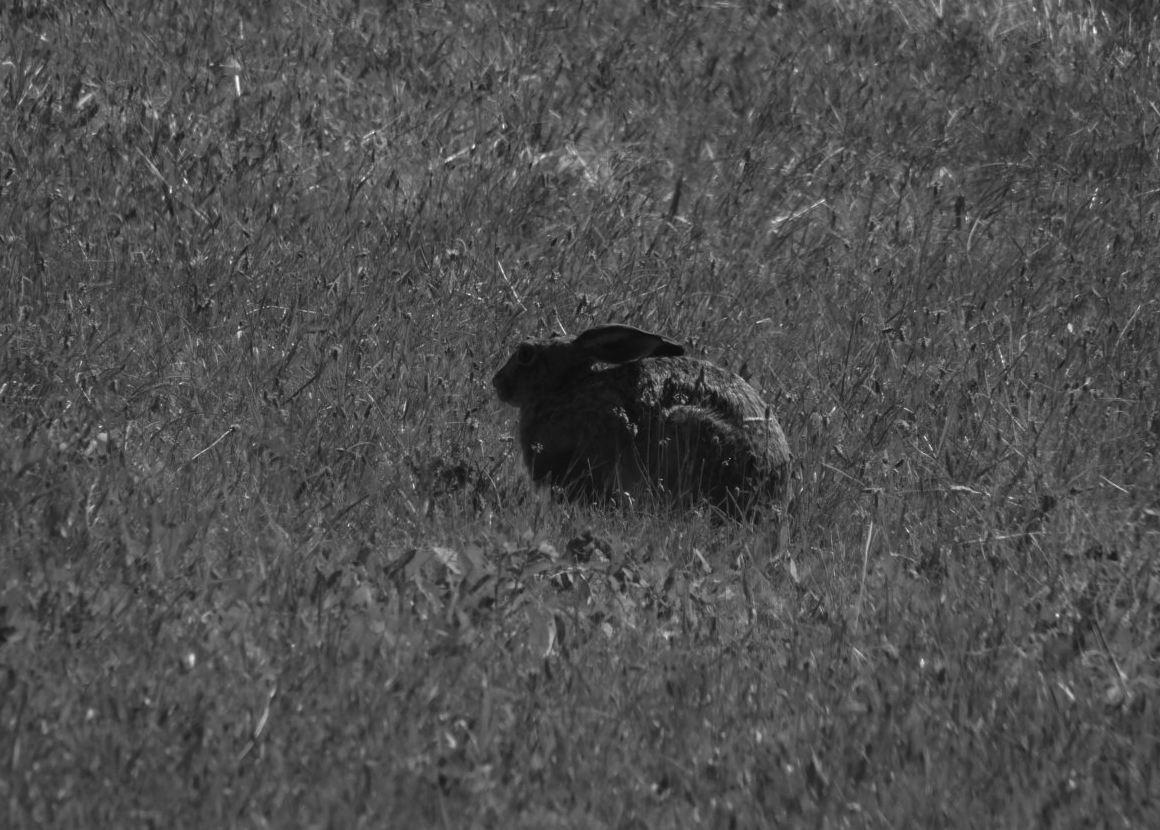

In [17]:
hare_gray = cv2.imread('Zajac.jpg', cv2.IMREAD_GRAYSCALE)
Image.fromarray(hare_gray)

Rozwiązanie:

In [21]:
from scipy.stats import norm

def histogram_matching(src_img: np.ndarray, **kwargs) -> np.ndarray:
    np.random.seed(2137)
    
    # WYZNACZAMY DYSTRYBUANTĘ ROZKŁADU SZAROŚCI OBRAZU
    pdf_src, bins = np.histogram(src_img, bins = 256, range = (0, 255))
    pdf_src = pdf_src / pdf_src.sum()
    cdf_src = np.cumsum(pdf_src)
    # WYZNACZAMY DYSTRYBUANTĘ WYBRANEGO ROZKŁADU BIMODALNEGO
    x = np.linspace(0, 255, 256)
    mu1, sigma1, w1 = kwargs['mu1'], kwargs['sigma1'], kwargs['w1']
    mu2, sigma2, w2 = kwargs['mu2'], kwargs['sigma2'], kwargs['w2']
    pdf1 = w1*norm.pdf(x, mu1, sigma1)
    pdf2 = w2*norm.pdf(x, mu2, sigma2)
    pdf_bimodal = pdf1 + pdf2
    cdf_bimodal = np.cumsum(pdf_bimodal)
    cdf_bimodal = cdf_bimodal / cdf_bimodal[-1]
    # WYKRES DYSTRYBUANT
    _, ax = plt.subplots(1, 1, figsize = (12, 5))
    ax.plot(bins[0:-1], cdf_src, color = 'blue', label = 'Rozkład oryginalny')
    ax.plot(bins[0:-1], cdf_bimodal, color = 'red', linestyle = '-.', label = 'Mikstura gaussowska\n(rozkład docelowy)')
    ax.set_title('Dystrybuanty rozkładu oryginalnego i docelowego')
    ax.set_xlabel(r'$k$')
    ax.set_ylabel(r'$P(X \leq k)$')
    ax.legend()
    plt.show()
    # WYZNACZENIE TABLICY LUT
    grays = np.array([*range(256)]).astype(int)
    src_dict = dict(zip(grays, cdf_src))

    for k, v in src_dict.items():
        diffs = np.abs(cdf_bimodal - v)
        gray_transform = np.argmin(diffs)
        src_dict[k] = gray_transform
    
    lut = np.array(list(src_dict.values()), dtype = np.uint8)
    out_img = cv2.LUT(hare_gray, lut)
    
    return out_img


def compare_images(src_img, lut_img):
    _, axs = plt.subplots(2, 2, figsize = (12, 6))
    axs[0, 0].imshow(src_img, cmap = 'gray')
    axs[0, 0].axis('off')
    axs[0, 0].set_title('Obraz oryginalny')
    axs[0, 1].hist(src_img.flatten(), bins = 255, color = 'gray', density = True)
    axs[1, 0].imshow(lut_img, cmap = 'gray')
    axs[1, 0].axis('off')
    axs[1, 0].set_title('Obraz po dopasowaniu histogramu')
    axs[1, 1].hist(lut_img.flatten(), bins = 255, color = 'gray', density = True)
    plt.show()


In [27]:
PARAMS = [
    {'mu1': 0, 'sigma1': 5, 'w1': 0.04, 'mu2': 120, 'sigma2': 5, 'w2': 0.96},
    {'mu1': 0, 'sigma1': 5, 'w1': 0.3, 'mu2': 120, 'sigma2': 5, 'w2': 0.7},
    {'mu1': 0, 'sigma1': 20, 'w1': 0.04, 'mu2': 120, 'sigma2': 20, 'w2': 0.96},
    {'mu1': 50, 'sigma1': 5, 'w1': 0.04, 'mu2': 200, 'sigma2': 5, 'w2': 0.96},
]

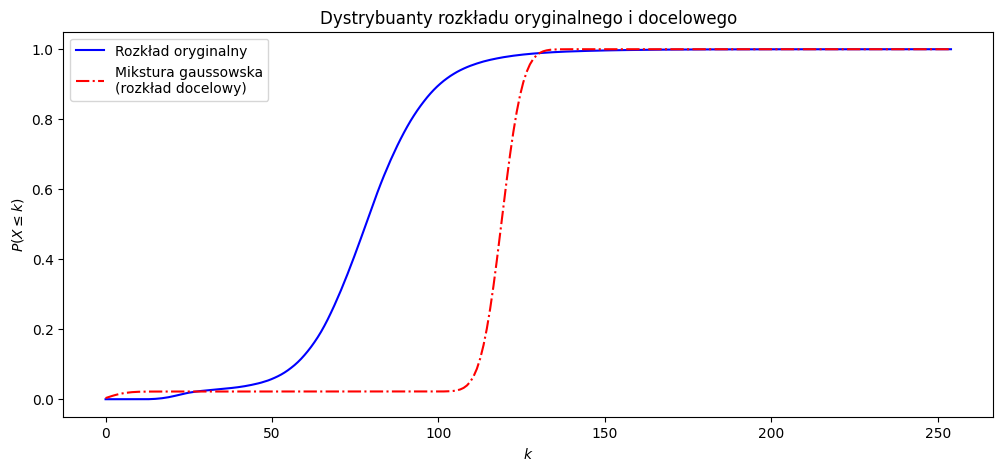

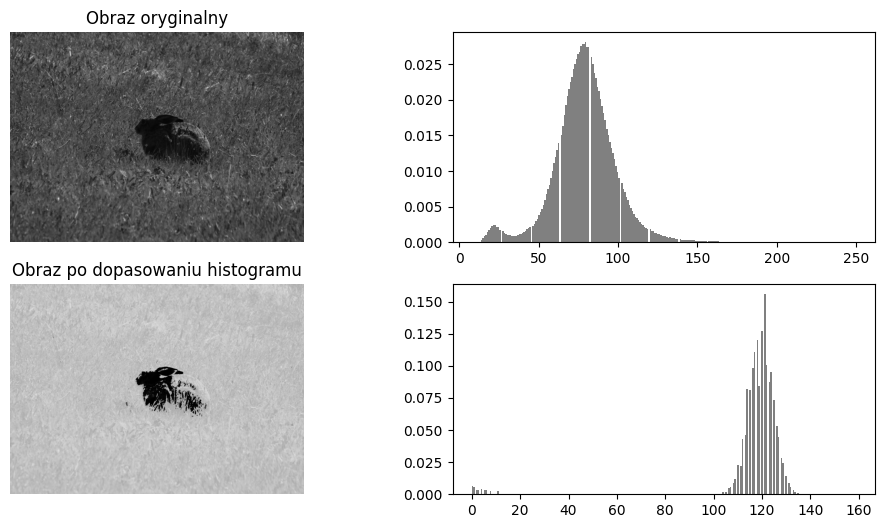

In [23]:
hare_lut1 = histogram_matching(hare_gray, **PARAMS[0])
compare_images(hare_gray, hare_lut1)

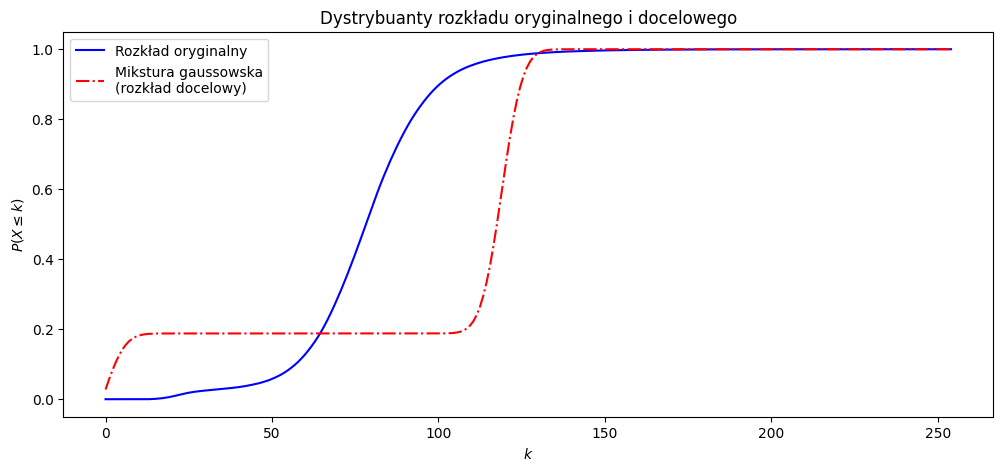

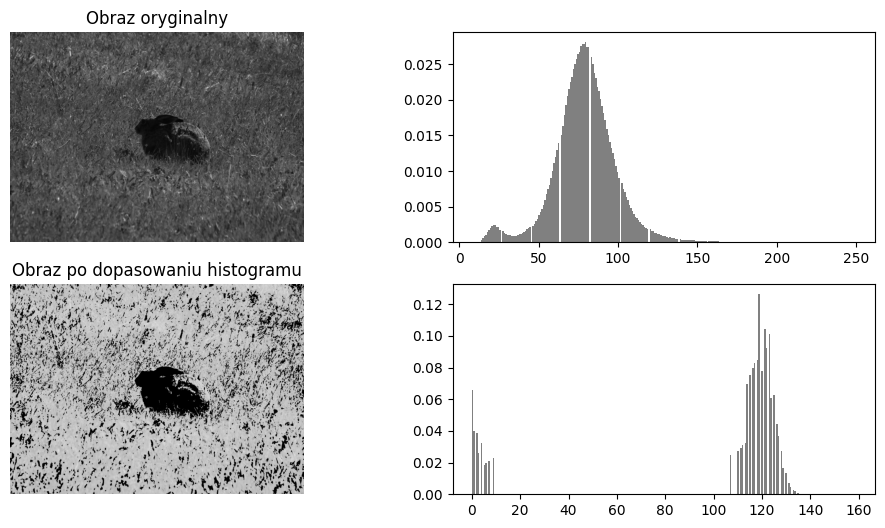

In [24]:
hare_lut2 = histogram_matching(hare_gray, **PARAMS[1])
compare_images(hare_gray, hare_lut2)

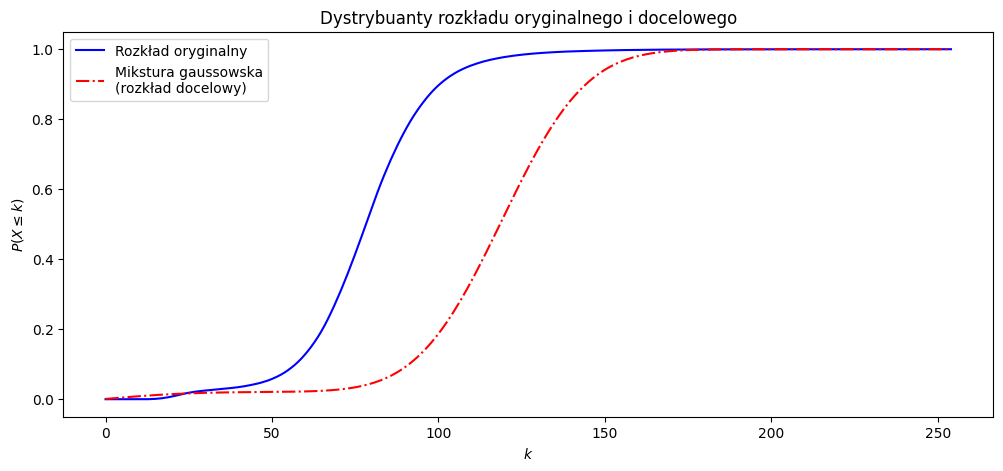

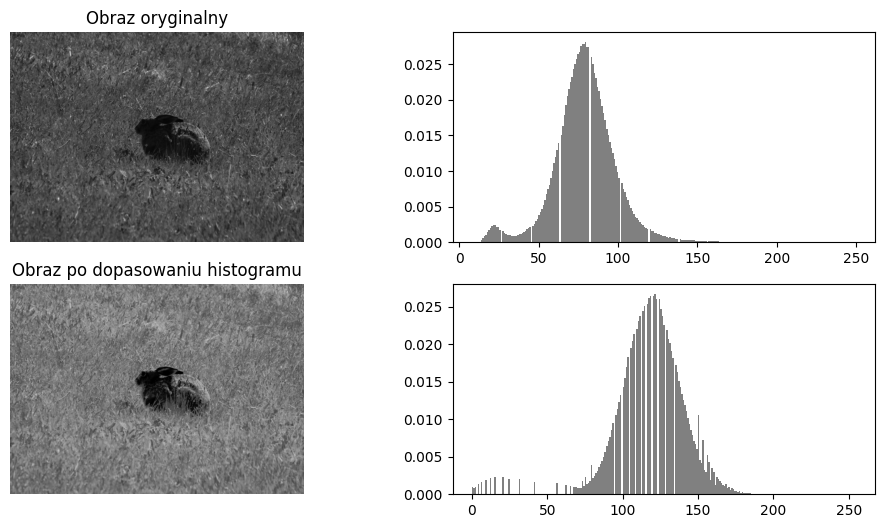

In [25]:
hare_lut3 = histogram_matching(hare_gray, **PARAMS[2])
compare_images(hare_gray, hare_lut3)

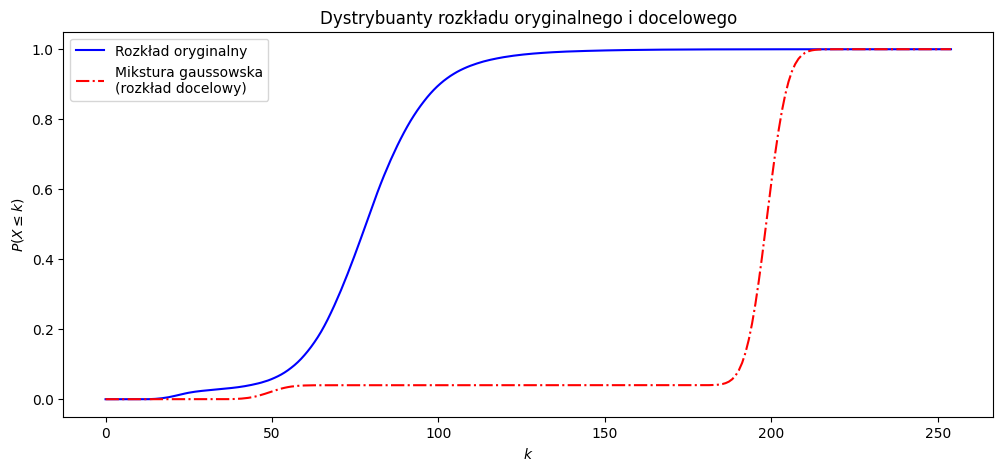

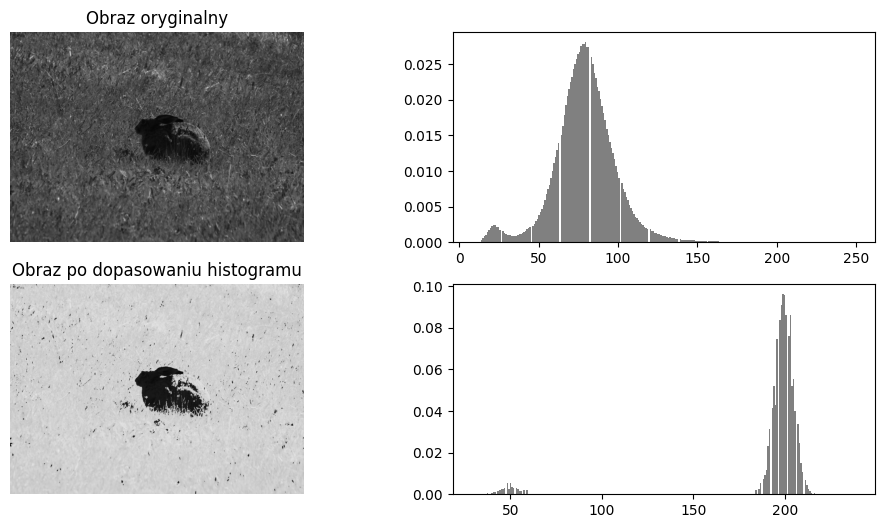

In [28]:
hare_lut4 = histogram_matching(hare_gray, **PARAMS[3])
compare_images(hare_gray, hare_lut4)

Text(0.5, 1.0, 'Bimodal 4')

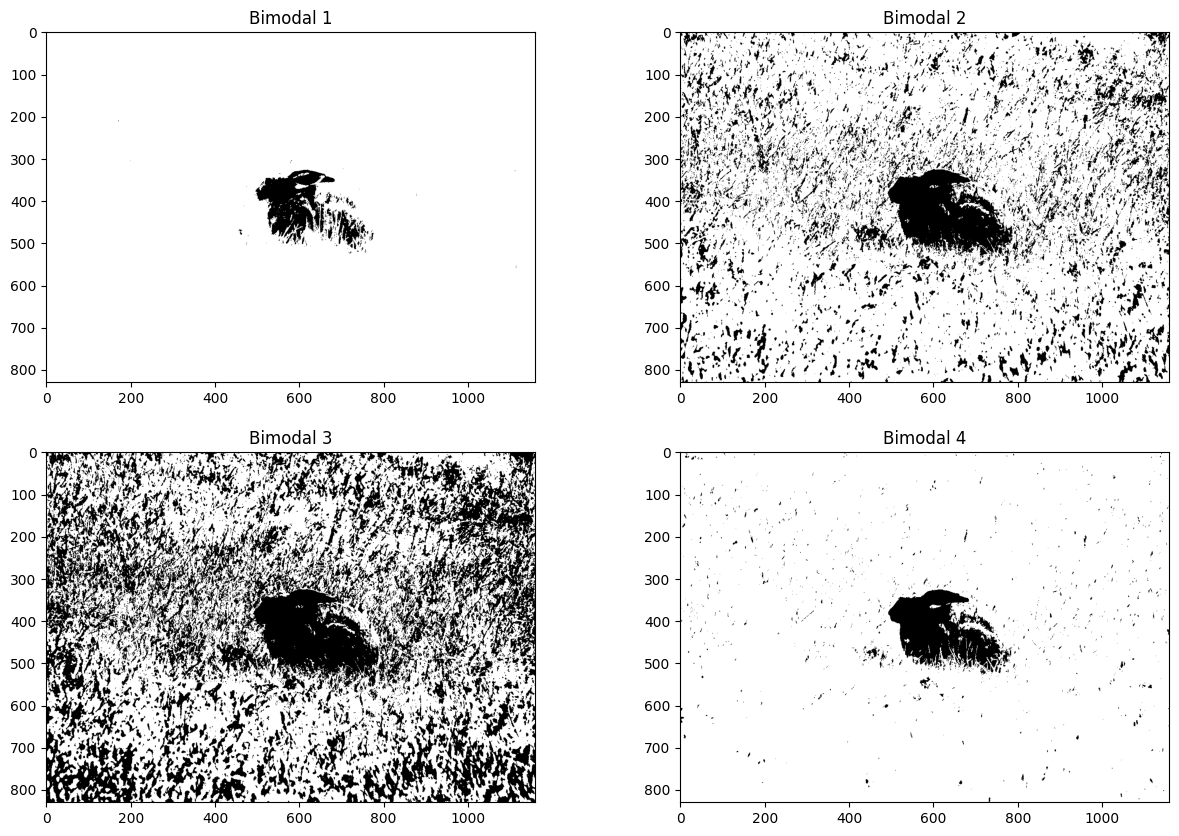

In [36]:
_, axs = plt.subplots(2, 2, figsize = (15, 10))
axs[0, 0].imshow(cv2.threshold(hare_lut1, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cmap = 'gray')
axs[0, 0].set_title('Bimodal 1')
axs[0, 1].imshow(cv2.threshold(hare_lut2, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cmap = 'gray')
axs[0, 1].set_title('Bimodal 2')
axs[1, 0].imshow(cv2.threshold(hare_lut3, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cmap = 'gray')
axs[1, 0].set_title('Bimodal 3')
axs[1, 1].imshow(cv2.threshold(hare_lut4, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1], cmap = 'gray')
axs[1, 1].set_title('Bimodal 4')

In [ ]:
PARAMS = [
    {'mu1': 0, 'sigma1': 5, 'w1': 0.04, 'mu2': 120, 'sigma2': 5, 'w2': 0.96},
    {'mu1': 0, 'sigma1': 5, 'w1': 0.3, 'mu2': 120, 'sigma2': 5, 'w2': 0.7},
    {'mu1': 0, 'sigma1': 20, 'w1': 0.04, 'mu2': 120, 'sigma2': 20, 'w2': 0.96},
    {'mu1': 50, 'sigma1': 5, 'w1': 0.04, 'mu2': 200, 'sigma2': 5, 'w2': 0.96},
]